# Introduction to Causal Inference

## Milestone 1: Loading and checking the raw discount data

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

import graphviz as gr

### Step 1

In [2]:
dataset = pd.read_csv("./non_rand_discount.csv", sep=";")

### Step 2

In [3]:
dataset.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,...,spend_6m_eletronic,sales,discount,profit,age,gender,cust_state,tenure,sales_prediction_bins,sales_prediction
0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,3368.64,US$ 125.0,40.06,40,1.0,MA,6,8,1351.024765
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,2133.10,US$ 75.0,29.52,36,0.0,MG,10,4,1035.580387
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,2001.62,US$ 50.0,48.08,34,0.0,RJ,7,3,992.401825
3,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,1461.96,US$ 10.0,61.64,31,0.0,BA,7,1,919.720735
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,2743.72,US$ 100.0,34.44,32,1.0,PB,6,6,1176.485681


### Step 3

In [4]:
dataset.dtypes

spend_1m_baby              int64
spend_2m_baby              int64
spend_3m_baby              int64
spend_4m_baby              int64
spend_5m_baby              int64
spend_6m_baby            float64
spend_1m_clothes           int64
spend_2m_clothes         float64
spend_3m_clothes         float64
spend_4m_clothes         float64
spend_5m_clothes         float64
spend_6m_clothes         float64
spend_1m_health            int64
spend_2m_health            int64
spend_3m_health            int64
spend_4m_health            int64
spend_5m_health            int64
spend_6m_health            int64
spend_1m_pet               int64
spend_2m_pet               int64
spend_3m_pet               int64
spend_4m_pet               int64
spend_5m_pet               int64
spend_6m_pet               int64
spend_1m_groceries         int64
spend_2m_groceries         int64
spend_3m_groceries       float64
spend_4m_groceries       float64
spend_5m_groceries       float64
spend_6m_groceries       float64
spend_1m_e

In [5]:
dataset["discount"] = pd.to_numeric(dataset["discount"].str.split(" ").str[-1])

### Step 4

In [6]:
dataset.isna().mean()

spend_1m_baby            0.000000
spend_2m_baby            0.000000
spend_3m_baby            0.000000
spend_4m_baby            0.000000
spend_5m_baby            0.000000
spend_6m_baby            0.000000
spend_1m_clothes         0.000000
spend_2m_clothes         0.000000
spend_3m_clothes         0.000000
spend_4m_clothes         0.000000
spend_5m_clothes         0.000000
spend_6m_clothes         0.000000
spend_1m_health          0.000000
spend_2m_health          0.000000
spend_3m_health          0.000000
spend_4m_health          0.000000
spend_5m_health          0.000000
spend_6m_health          0.000000
spend_1m_pet             0.000000
spend_2m_pet             0.000000
spend_3m_pet             0.000000
spend_4m_pet             0.000000
spend_5m_pet             0.000000
spend_6m_pet             0.000000
spend_1m_groceries       0.000000
spend_2m_groceries       0.000000
spend_3m_groceries       0.000000
spend_4m_groceries       0.000000
spend_5m_groceries       0.000000
spend_6m_groce

All the data types seem correct. We only have one column which is not numeric, `cust_state`, but that is expected. The treatment variable is `discount`, the outcome primarily `profit`, but we can argue `sales` is also an outcome variable. All the other variables are covariates. There are some missing values in gender, probably from customers that did not wish to report that.

## Milestone 2: Understanding the Treatment Assignment Mechanism

 
The profit equation of this company is:
 
$
Profit_i = Sales_i * 5\% - Discount_i
$
 
Now, let's see how discount is correlated with both of these variables. We won't make any causal statements for now.

### Step 1

<AxesSubplot:xlabel='discount', ylabel='sales'>

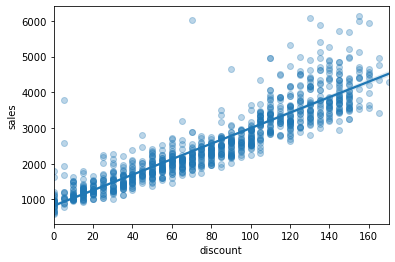

In [7]:
sns.regplot(data = dataset.sample(1000), x="discount", y="sales", scatter_kws={"alpha":0.3})

<AxesSubplot:xlabel='discount', ylabel='profit'>

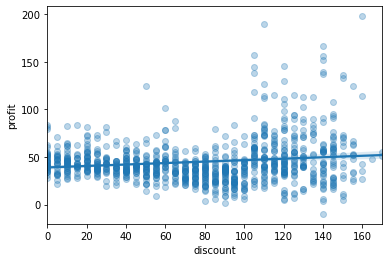

In [8]:
sns.regplot(data = dataset.sample(1000), x="discount", y="profit", scatter_kws={"alpha":0.3})

There seems to be a positive correlation between discount and dales and between discount and profit. But we can't make any causal statement yet. For that, we need to check if customers with low discount levels are comparable to those with high discount levels. If that's not the case, it could be that the correlation is spurious. For instance, it could be that those that get more discounts already spend more in the first place, even if they didn't get the discount. 
 
### Step 2
 
Let's look for any fundamental difference between those customers that have high discount and those that have low discount. Ideally, they should be comparable, as if in a randomized trial. In other words, customers that receive low discount should be similar to those that received high discount, except for their discount level. 

<AxesSubplot:xlabel='tenure', ylabel='discount'>

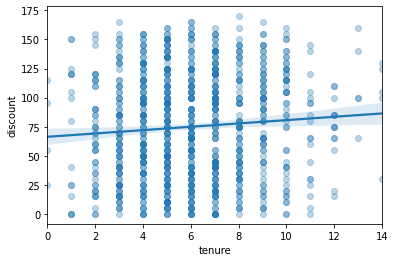

In [9]:
sns.regplot(data = dataset.sample(1000), x="tenure", y="discount", scatter_kws={"alpha":0.3})

<AxesSubplot:xlabel='age', ylabel='discount'>

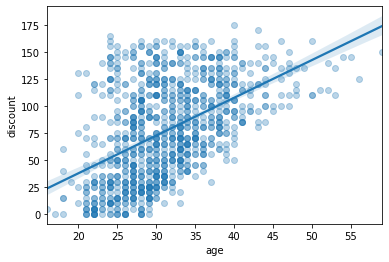

In [10]:
sns.regplot(data = dataset.sample(1000), x="age", y="discount", scatter_kws={"alpha":0.3})

<AxesSubplot:xlabel='spend_4m_groceries', ylabel='discount'>

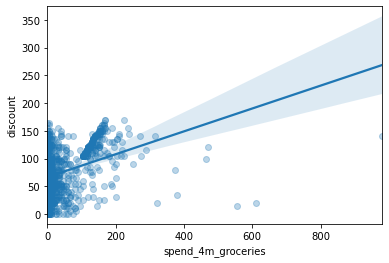

In [11]:
sns.regplot(data = dataset.sample(1000), x="spend_4m_groceries", y="discount", scatter_kws={"alpha":0.3})

<AxesSubplot:xlabel='sales_prediction', ylabel='discount'>

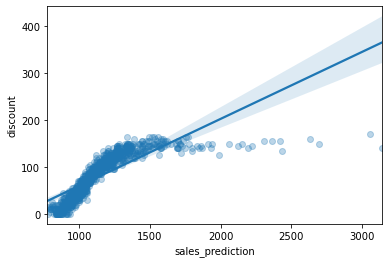

In [12]:
sns.regplot(data = dataset.sample(1000), x="sales_prediction", y="discount", scatter_kws={"alpha":0.3})

<AxesSubplot:xlabel='cust_state', ylabel='discount'>

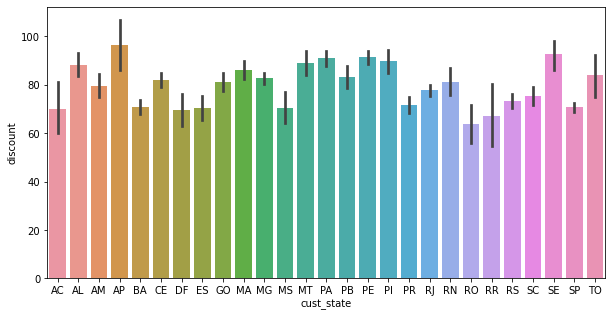

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(data = dataset.sort_values("cust_state"), x="cust_state", y="discount")

### Step 3

<AxesSubplot:xlabel='discount', ylabel='profit'>

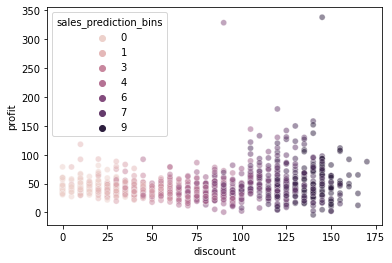

In [14]:
sns.scatterplot(data = dataset.sample(1000), x="discount", y="profit", hue="sales_prediction_bins", alpha=0.5)

### Step 4

As we can see, the higher the age, the higher the discount level. Also, the higher the `sales_prediction`, the higher the discount level. This indicates that the company was giving more discounts to those that it predicted to spend more. That's problematic for our causal statements. It means that those with a high discount would have bought more even without the discount. In potential outcome terms
 
$$
E[Profit_0|Discount=High] > E[Profit_0|Discount=Low]
$$
 
that is, those with high discount levels, had they received a low discount level (potential outcome 0) would still generate more profit that those that received a low discount level.

 